In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/wines.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,13.006369,2.332849,2.366760,19.472626,99.888268,2.297877,2.034972,0.361508,1.594860,5.060950,0.957911,2.618436,748.653631
std,0.813191,1.114987,0.273592,3.343530,14.376902,0.625186,0.998967,0.124189,0.573204,2.312081,0.228012,0.713730,314.903646
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.365000,1.605000,2.210000,17.150000,88.000000,1.745000,1.210000,0.270000,1.250000,3.230000,0.785000,1.945000,501.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.700000,0.970000,2.780000,675.000000
75%,13.685000,3.065000,2.555000,21.500000,107.500000,2.800000,2.885000,0.435000,1.955000,6.200000,1.120000,3.175000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


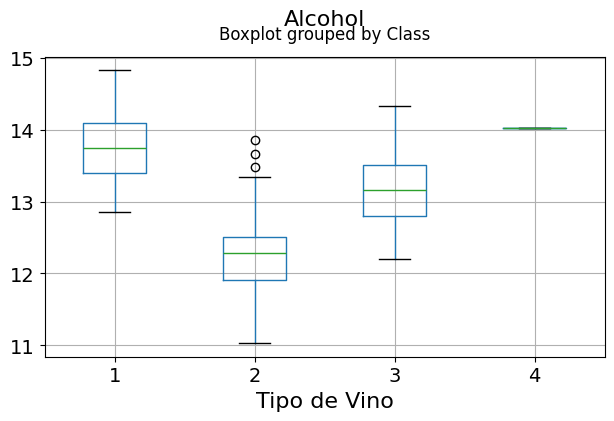

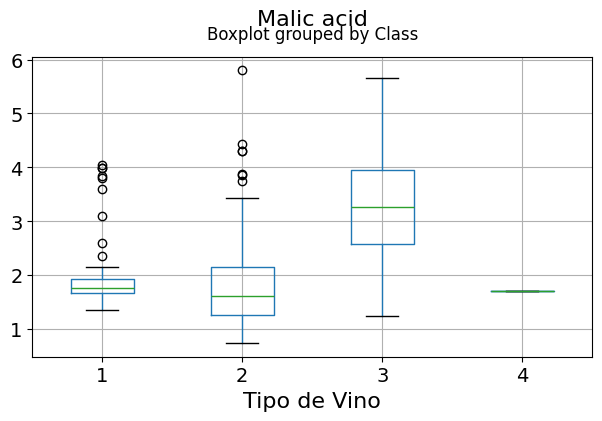

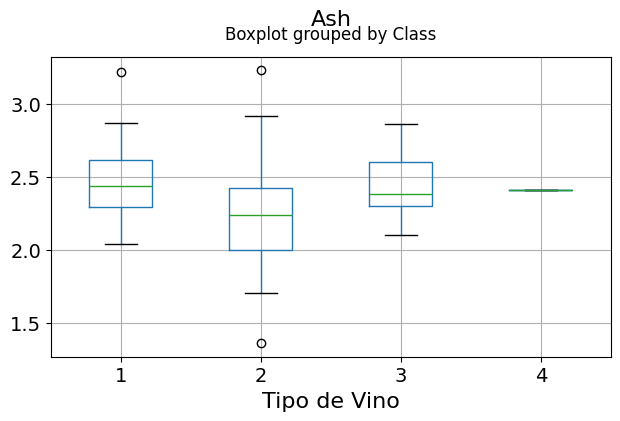

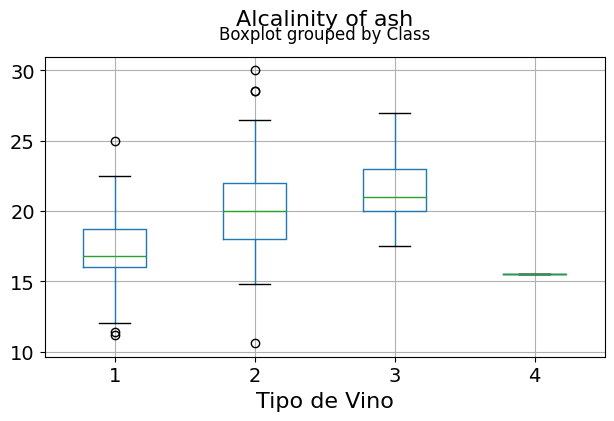

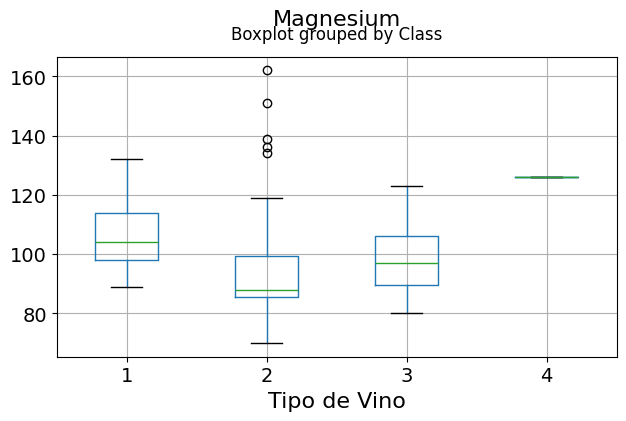

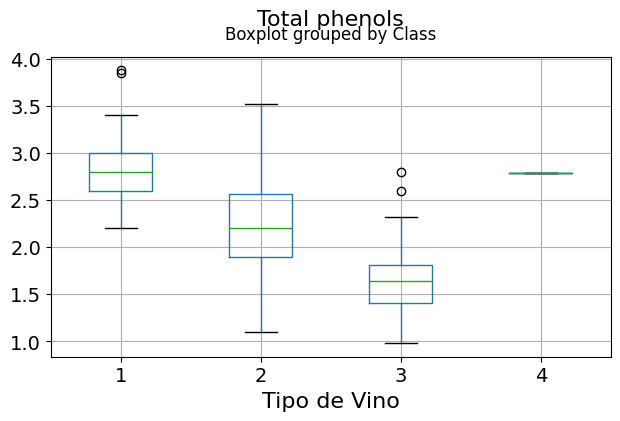

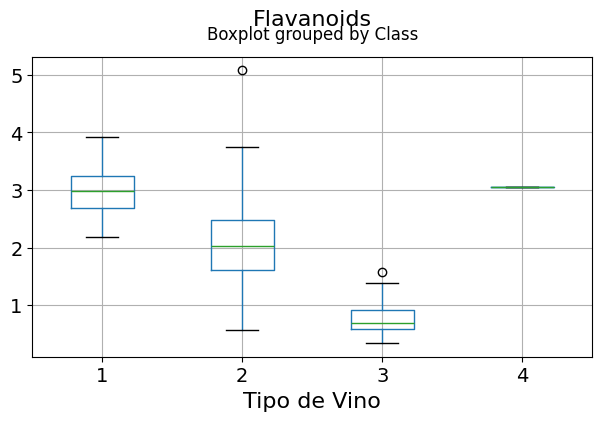

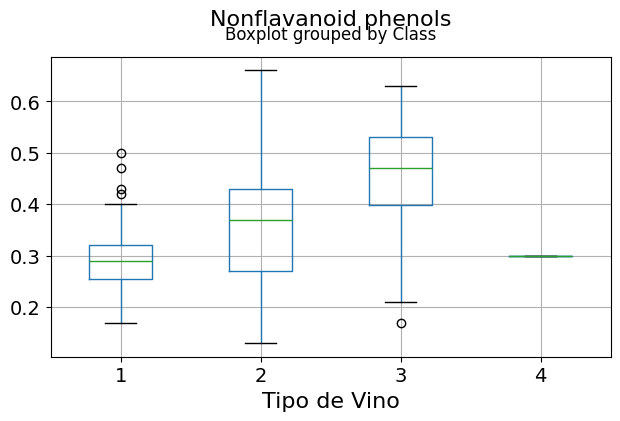

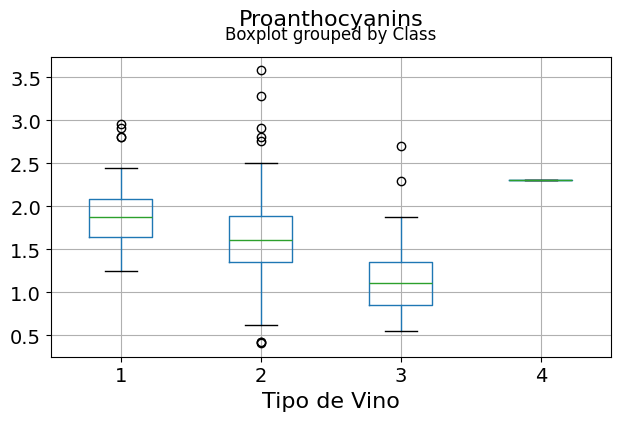

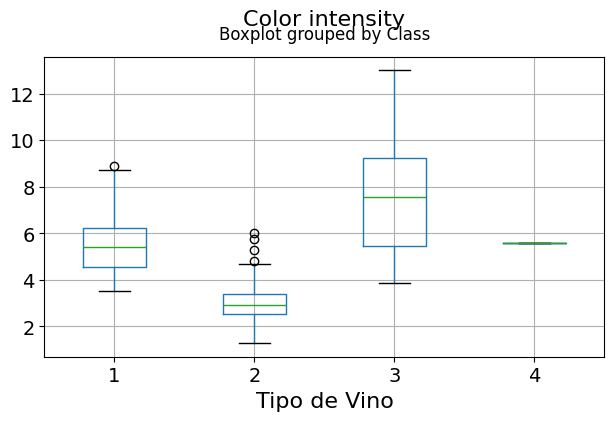

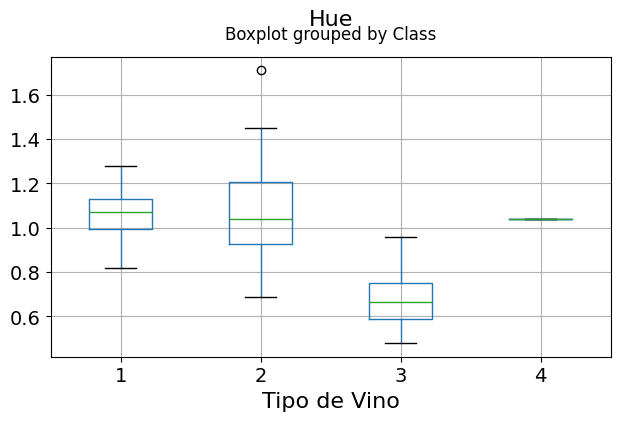

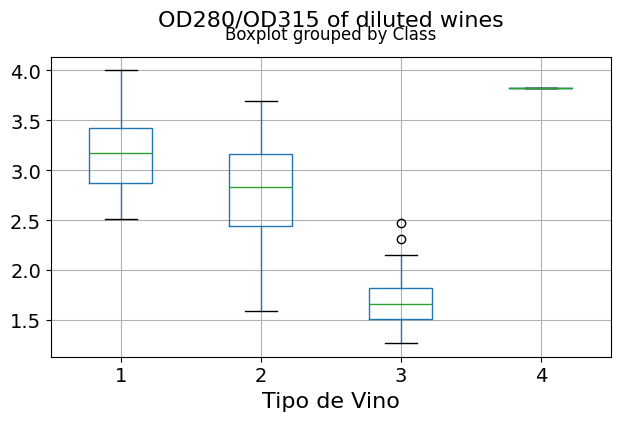

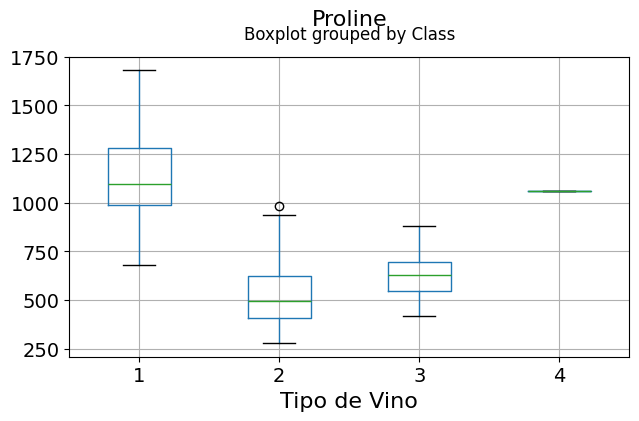

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Tipo de Vino", fontsize=16)

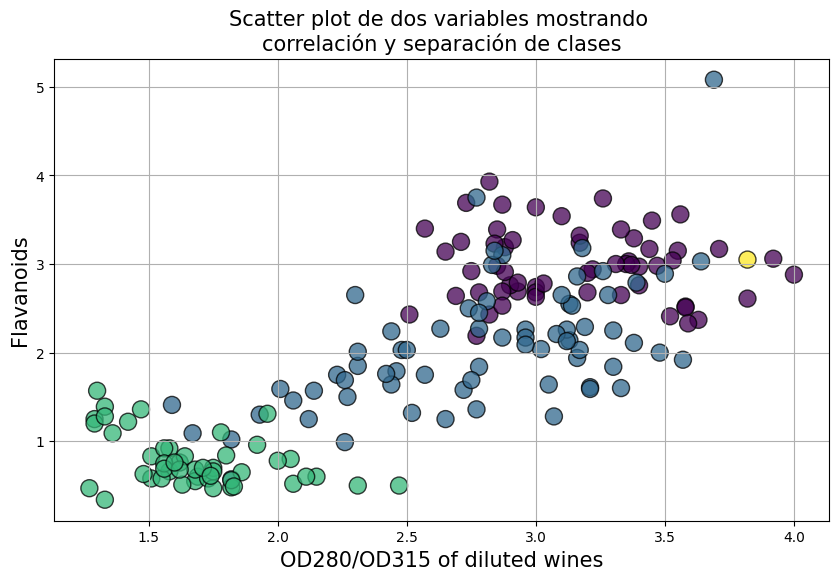

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

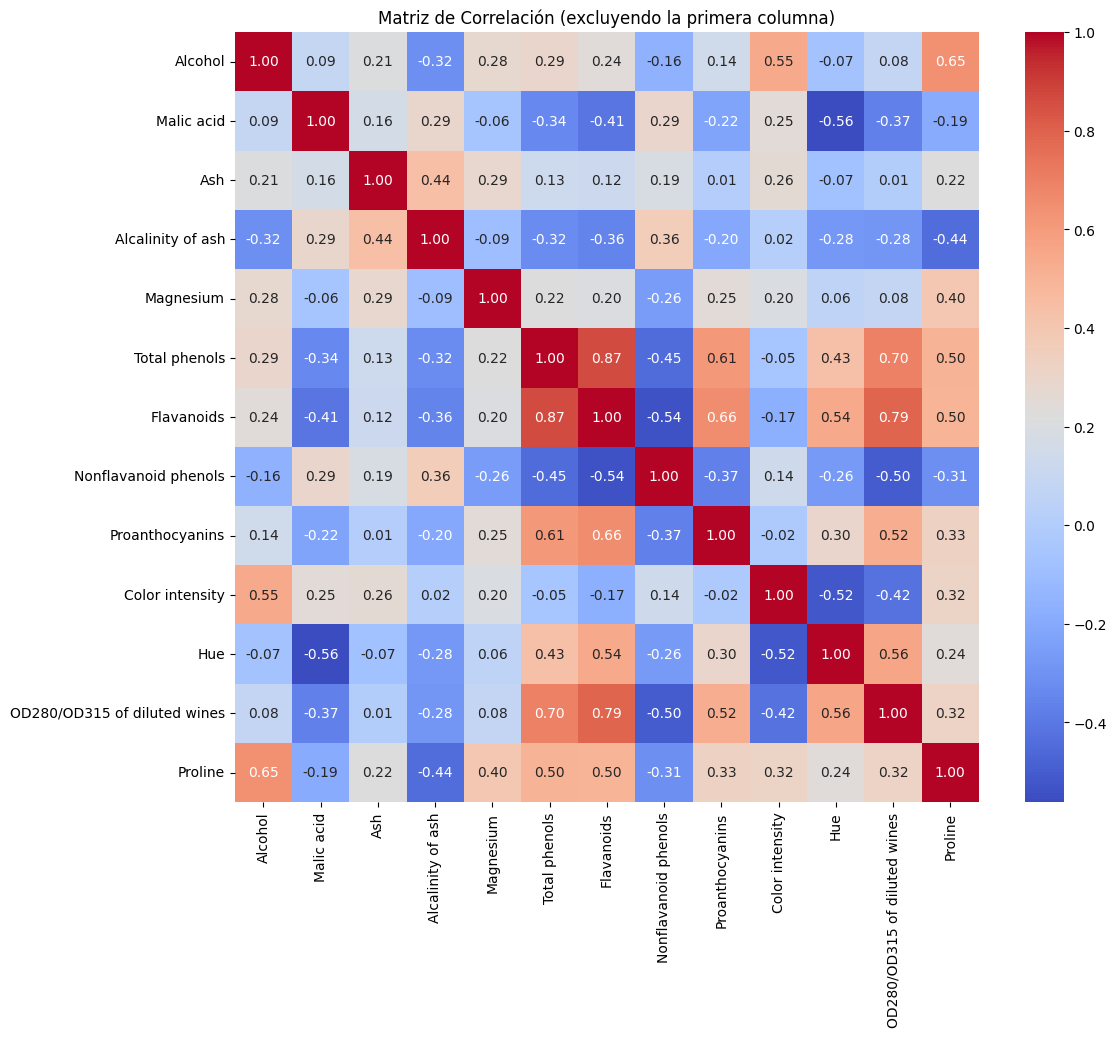

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()

In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 3):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
nuevo_df = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca = PCA(n_componentes=3)
pca_proyeccion = pca.run(nuevo_df)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


<ipython-input-37-4c3ec7613a18>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)


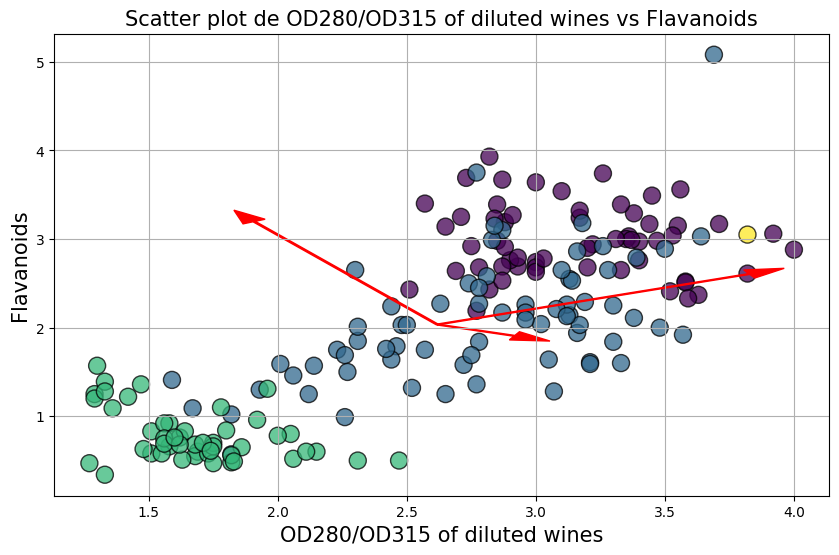

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

centroide = np.mean(nuevo_df, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(nuevo_df['OD280/OD315 of diluted wines'],nuevo_df['Flavanoids'], c=df['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Scatter plot de OD280/OD315 of diluted wines vs Flavanoids", fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines", fontsize=15)
plt.ylabel("Flavanoids", fontsize=15)

for i in range(pca.n_componentes):
  vector = pca.vectores_propios[:, i] * pca.valores_propios[i]
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.508949,-0.560183,0.231797,-1.161494,1.891074,0.805411,1.028967,-0.658164,1.216127,0.251148,0.361032,1.828723,1.007399
1,0.238781,-0.497226,-0.831151,-2.481160,0.007793,0.564809,0.727814,-0.819661,-0.550839,-0.295344,0.405012,1.098113,0.959632
2,0.189454,0.024419,1.111477,-0.261721,0.077545,0.805411,1.209658,-0.496668,2.125853,0.268497,0.317052,0.774959,1.389537
3,1.681593,-0.344330,0.488370,-0.801585,0.914558,2.489623,1.460619,-0.981157,1.023685,1.187992,-0.430614,1.168364,2.328959
4,0.288108,0.231278,1.844544,0.458096,1.263314,0.805411,0.657545,0.230064,0.393876,-0.321368,0.361032,0.437754,-0.043480
5,1.471954,-0.515213,0.305103,-1.281463,0.844807,1.559296,1.360235,-0.173676,0.656296,0.732582,0.405012,0.325352,2.233425
6,1.706257,-0.416281,0.305103,-1.461418,-0.271211,0.324207,0.486892,-0.496668,0.673791,0.081996,0.273071,1.351016,1.723908
7,1.299310,-0.164452,0.891557,-0.561646,1.472567,0.484609,0.476853,-0.415920,-0.603323,-0.004749,0.448993,1.351016,1.739830
8,2.248853,-0.623140,-0.721191,-1.641372,-0.201460,0.805411,0.948659,-0.577416,0.673791,0.060309,0.536953,0.325352,0.943710
9,1.052675,-0.883962,-0.354657,-1.041524,-0.131709,1.094133,1.119312,-1.142653,0.446360,0.936432,0.229091,1.308866,0.943710


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,-1.786281e-15,-1.587805e-16,7.306384e-16,-2.381707e-16,-4.167988e-16,-3.572561e-16,1.190854e-16,-6.351220e-16,-1.984756e-16,2.480945e-16,-1.190854e-16,-6.351220e-16,7.939025e-17
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-2.437205e+00,-1.432588e+00,-3.690113e+00,-2.661114e+00,-2.084740e+00,-2.113890e+00,-1.701485e+00,-1.869386e+00,-2.072880e+00,-1.639888e+00,-2.101867e+00,-1.894579e+00,-1.498788e+00
25%,-7.909186e-01,-6.546183e-01,-5.745772e-01,-6.966114e-01,-8.292201e-01,-8.868211e-01,-8.281420e-01,-7.389126e-01,-6.033235e-01,-7.941268e-01,-7.604668e-01,-9.461904e-01,-7.886486e-01
50%,5.380492e-02,-4.252745e-01,-2.477685e-02,8.210212e-03,-1.317088e-01,9.964584e-02,1.054315e-01,-1.736760e-01,-6.098718e-02,-1.565525e-01,5.316953e-02,2.270009e-01,-2.345487e-01
75%,8.368698e-01,6.584872e-01,6.899636e-01,6.080584e-01,5.309268e-01,8.054108e-01,8.532942e-01,5.934307e-01,6.300542e-01,4.940334e-01,7.128747e-01,7.819836e-01,7.606020e-01
max,2.248853e+00,3.118311e+00,3.164065e+00,3.157413e+00,4.332363e+00,2.537743e+00,3.056728e+00,2.410262e+00,3.472946e+00,3.443356e+00,3.307715e+00,1.941125e+00,2.965856e+00


In [ ]:
pca = PCA(n_componentes=3)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2]


In [ ]:
porcentaje_explicacion_varianza = pca.valores_propios/np.sum(pca.valores_propios) * 100

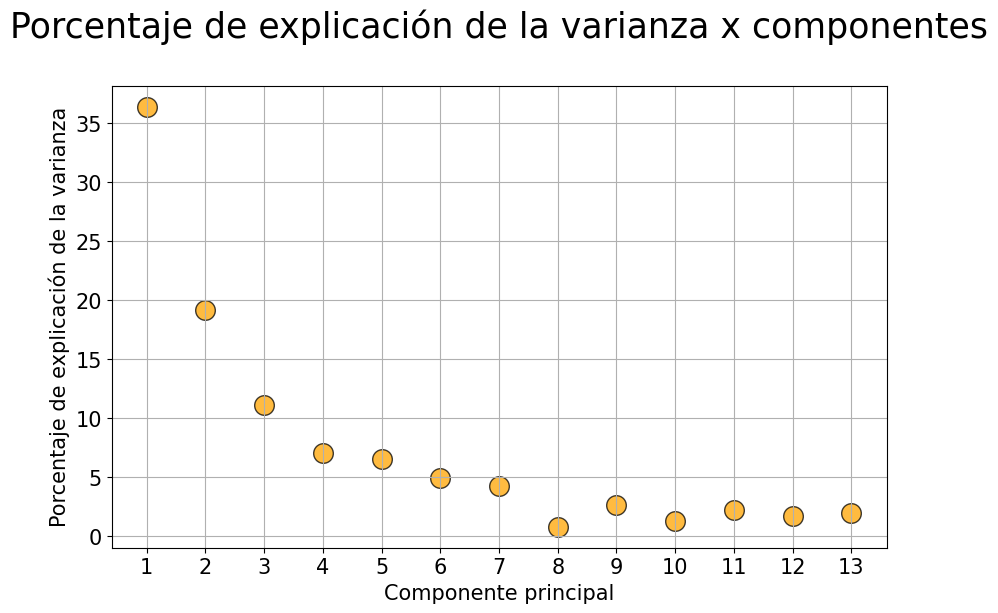

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(porcentaje_explicacion_varianza))],
            y=porcentaje_explicacion_varianza,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Porcentaje de explicación de la varianza x componentes\n",fontsize=25)
plt.xlabel("Componente principal",fontsize=15)
plt.xticks([i+1 for i in range(len(porcentaje_explicacion_varianza))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Porcentaje de explicación de la varianza",fontsize=15)
plt.show()

In [ ]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1,2
0,-3.312821,1.410403,0.168405
1,-2.190739,-0.358144,2.019291
2,-2.501594,1.006164,-0.989508
3,-3.756309,2.718077,0.170441
4,-0.996828,0.853626,-2.030768
5,-3.048723,2.085505,0.619071
6,-2.439261,1.150364,0.965943
7,-2.055219,1.582926,-0.150742
8,-2.502308,0.885882,1.760789
9,-2.739550,0.762037,0.979337


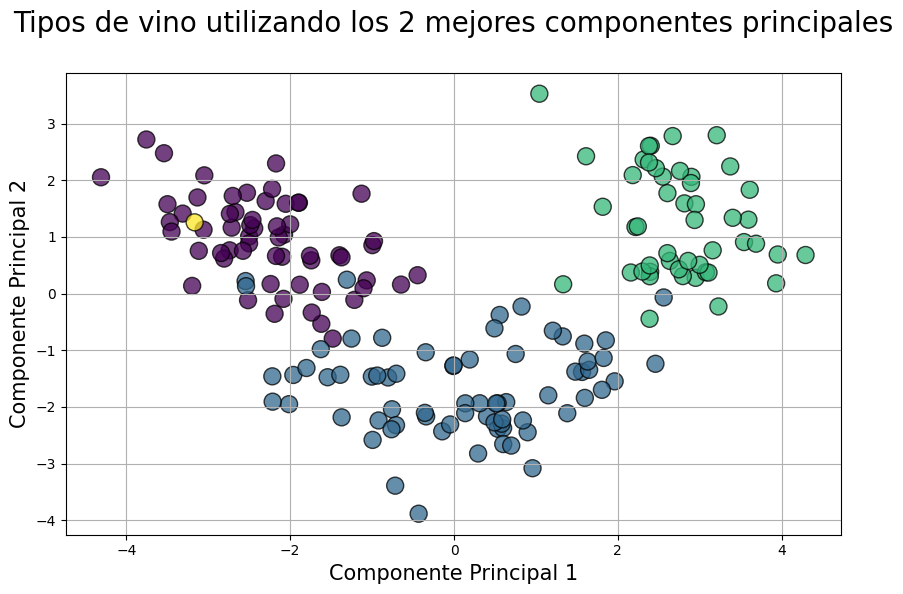

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 2 mejores componentes principales\n",fontsize=20)
plt.xlabel("Componente Principal 1",fontsize=15)
plt.ylabel("Componente Principal 2",fontsize=15)
plt.show()

In [ ]:
  import matplotlib.pyplot as plt
  import numpy as np

In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
points = dfx_trans.values
print(points)
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[[-3.31282124e+00  1.41040306e+00  1.68404745e-01]
 [-2.19073947e+00 -3.58144339e-01  2.01929064e+00]
 [-2.50159418e+00  1.00616446e+00 -9.89507501e-01]
 [-3.75630938e+00  2.71807740e+00  1.70440984e-01]
 [-9.96828029e-01  8.53626164e-01 -2.03076768e+00]
 [-3.04872311e+00  2.08550462e+00  6.19071407e-01]
 [-2.43926105e+00  1.15036419e+00  9.65943293e-01]
 [-2.05521858e+00  1.58292591e+00 -1.50741626e-01]
 [-2.50230815e+00  8.85882265e-01  1.76078879e+00]
 [-2.73955045e+00  7.62036790e-01  9.79337081e-01]
 [-3.46948378e+00  1.26026480e+00  4.16233212e-01]
 [-1.74275849e+00  5.84795724e-01  1.18030674e+00]
 [-2.09851574e+00  6.48929566e-01  8.50543594e-01]
 [-3.44914780e+00  1.09289217e+00  1.18286737e+00]
 [-4.30984247e+00  2.05132039e+00  1.24972466e+00]
 [-2.29991057e+00  1.63165179e+00 -2.30178448e-01]
 [-2.17266776e+00  2.29553705e+00 -8.38263381e-01]
 [-1.89363030e+00  1.60240305e+00 -8.03028623e-01]
 [-3.54097775e+00  2.47567010e+00  4.71144541e-01]
 [-2.07502887e+00  1.03795874e+

en esta parte analizamos el kmeans con los 3 componentes

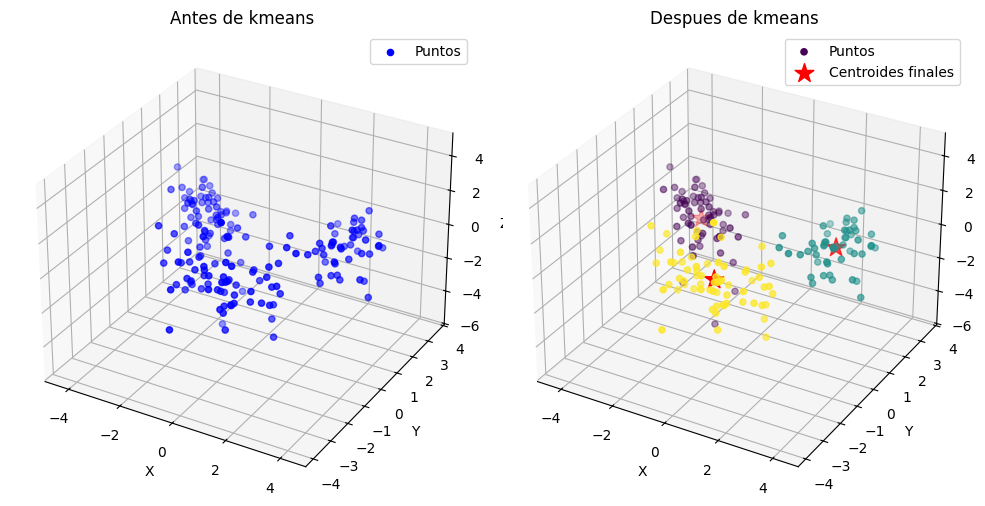

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [ ]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 1 1 2 1 2 0 1 0 0 0 0 1 1 1 1 2 0 0 1 0 1 0 1 1 1 0 1 0 2 0 0 0 0 2 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 2 2 1 2 1 1 1 1 2 0 1 1 0 2 1 1 1 1 1 0 1 1 1
 0 2 2 1 1 0 1 0 1 0 1 2 1 1 2 0 1 2 0 0 1 0 2 1 1 1 1 0 1 1 1 2 2 1 2 1 1
 0 1 1 1 0 0 2 0 1 2 1 1 2 1 1 0 1 1 2 2 0 1 1 1 2 2 2 2 1 0 1 2 2 1 0 1 1
 1 1 1 0 1 1 0 2 0 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 2 0 1 1 1 0 1 2 1 2 2
 1 0 2 2 0 0 2 0 1 0 2 1 1 2 1 0 1 1 1 0 1 1 2 1 1 0 1 1 1 2 0 1 1 0 1 2 1
 2 1 0 2 1 2 0 2 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 0 0 2 1 1 1 1 2 1 2 1 2 1 0
 0 0 1 1 2 1 2 1 2 0 0 1 1 0 2 0 2 2 1 2 0 1 2 1 0 0 2 2 1 1 2 1 1 0 0 1 0
 1 2 0 1 2 1 1 0 2 1 0 1 2 1 0 2 1 1 1 2 2 1 2 0 1 1 1 1 1 0 2 1 2 1 1 1 1
 0 2 0 0 1 0 1 1 1 0 1 1 2 2 2 1 1 1 2 2 0 1 1 1 1 2 2 1 2 1 2 2 2 1 1 2 2
 0 1 2 1 0 0 1 2 2 1 0 0 1 2 1 0 0 1 1 1 1 0 0 0 1 1 0 2 1 2 1 1 1 2 0 1 2
 1 1 1 0 0 1 1 2 0 0 0 1 1 0 2 0 2 1 0 2 1 1 2 1 0 1 2 0 0 1 1 0 2 2 1 2 1
 0 0 1 2 2 0 1 0 0 1 0 1 2 2 2 1 2 1 1 1 0 0 2 1 1 1 0 0 2 0 2 0 1 1 0 1 1
 1 1 2 2 0 1 2 1 1 1 0 2 

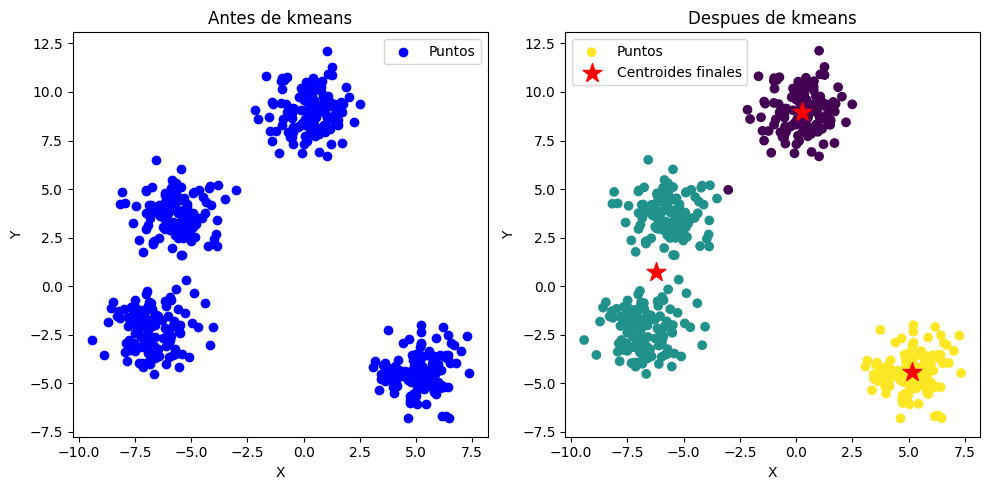

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

**¿A qué tipo de vino pertenece?**

La columna "Clase" en los datosen los datos indican el tipo de vino

Para saber a qué tipo pertenece un vino, se puede entrenar un modelo de clasificación con todas las características

Si tienes un vino nuevo, este modelo puede predecir su categoría con buena precisión

**¿Qué pasa si usamos solo los 2 mejores componentes?**

Estos componentes explican aproximadamente el 30% de la información

Aunque pueden captar parte de los patrones importantes el modelo perderá precisión

El resultado será menos exacto que usando todos los datos pero aún puede funcionar

**¿Y si usamos los 5 mejores componentes?**

Con estos cinco componentes se conserva más del 55% de la información

La clasificación mejora en comparación con usar solo 2 componentes

No es tan preciso como usar todos los datos pero el equilibrio entre eficiencia y precisión es bueno

**¿Qué pasa si usamos los 3 peores componentes?**

Estos componentes contienen menos del 12% de la información útil .

Como casi no aportan valor a la clasificación, el modelo será muy impreciso .

Básicamente, los resultados no serán confiables y la clasificación podría ser casi aleatoria.